## 4-5. 워드클라우드 만들기 - 해시코드 질문 키워드

- bs4와 wordcloud를 이용해서 질문 키워드를 보여주는 시각화를 진행해봅시다.

### Target: 해시코드 질문 제목의 키워드

지난 실습에서 해시코드(https://hashcode.co.kr) 질문태그를 활용해 Bar Plot을 그렸다면,   
이번 실습에서는 질문 제목을 스크래핑한 후, 형태소 분석을 진행해서 워드클라우드를 그려봅시다.

In [ ]:
%pip install nltk

In [2]:
# 다음 User-Agent를 추가해봅시다.
# What is my User Agent?
# https://www.whatismybrowser.com/detect/what-is-my-user-agent/

user_agent = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/140.0.0.0 Safari/537.36"}

In [ ]:
# Pagination이 되어있는 질문 리스트의 제목을 모두 가져와 리스트 questions에 저장해봅시다.
# https://hashcode.co.kr/?page={i}
# 과도한 요청을 방지하기 위해 0.5초마다 요청을 보내봅시다.

import time
import re

titles = []

import requests
from bs4 import BeautifulSoup

for i in range(1, 3):
    res = requests.get("https://quotes.toscrape.com/page/{}/".format(i), user_agent)
    soup = BeautifulSoup(res.text, "html.parser")

    # 1. class='quote' 인 div 가져오기
    # 2. 1번 안에 있는 class='text' 인 span 가져오기

    quotes = soup.find_all("div", "quote")
    for q in quotes:
        for t in q.find_all("span", "text"):
            title = re.sub(r'[\“\”]', '', t.text)   # 정규표현식
            titles.append(title)
    time.sleep(0.5)

print(titles)

In [14]:
titles[:10]

['The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.',
 'It is our choices, Harry, that show what we truly are, far more than our abilities.',
 'There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.',
 'The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.',
 "Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.",
 'Try not to become a man of success. Rather become a man of value.',
 'It is better to be hated for what you are than to be loved for what you are not.',
 "I have not failed. I've just found 10,000 ways that won't work.",
 "A woman is like a tea bag; you never know how strong it is until it's in hot water.",
 'A day without sunshine is like, you know, night.']

In [31]:
# 텍스트 구름을 그리기 위해 필요한 라이브러리를 불러와봅시다.

# 시각화에 쓰이는 라이브러리
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 횟수를 기반으로 딕셔너리 생성
from collections import Counter

In [ ]:
# 명사 추출을 위한 라이브러리
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [37]:
# 명사 추출해서 담아주기

words = []

for title in titles:
    words += word_tokenize(title)

print(len(words))

803


In [ ]:
# counter를 이용해 각 단어의 개수를 세줍니다.

counter = Counter(words)

counter

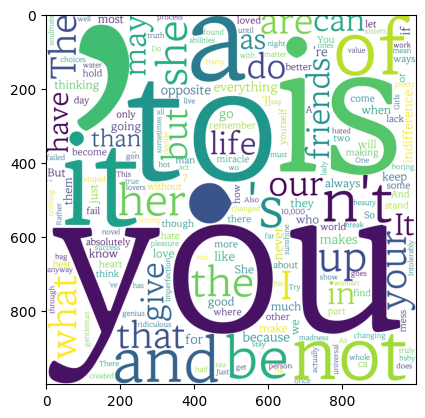

In [39]:
# WordCloud를 이용해 텍스트 구름을 만들어봅시다.

worldcloud = WordCloud(
    font_path="/Users/kang/Downloads/font/MaruBuri-Regular.ttf",
    background_color="white",
    height=1000,
    width=1000,
)

img = worldcloud.generate_from_frequencies(counter)
plt.imshow(img)